In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas_visual_analysis import VisualAnalysis, DataSource
import os
from pandas_profiling import ProfileReport
import datetime
import seaborn as sns

C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### Cleaning the data

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
##profile = ProfileReport(df)
#profile.to_file(output_file='life_expectancy.html')

In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape


(2938, 22)

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [13]:
df.rename(columns = lambda x: x.replace(" ", "_").lower(),inplace = True)

In [14]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [15]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [16]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [17]:
df['thinness__1-19_years'].mean()

4.839703856749312

In [18]:
df['thinness__1-19_years'].fillna(df['thinness__1-19_years'].mean(), inplace=True)

In [19]:
df['thinness_5-9_years'].mean()

4.870316804407714

In [20]:
df['thinness_5-9_years'].fillna(df['thinness_5-9_years'].mean(), inplace=True)

In [21]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                 0
thinness_5-9_years                   0
income_composition_of_resources    167
schooling                          163
dtype: int64

In [22]:
#ffill and bfill values

df['life_expectancy'].fillna(method='bfill', inplace=True)
df['adult_mortality'].fillna(method='bfill', inplace=True)
df['bmi'].fillna(method='ffill', inplace=True)
df['polio'].fillna(method='ffill', inplace=True)
df['diphtheria'].fillna(method='ffill', inplace=True)

In [23]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                  0
under-five_deaths                    0
polio                                0
total_expenditure                  226
diphtheria                           0
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                 0
thinness_5-9_years                   0
income_composition_of_resources    167
schooling                          163
dtype: int64

In [24]:
#drop columns with lot of missing values 
df.drop(['alcohol','hepatitis_b','total_expenditure','gdp'],axis=1, inplace=True)


In [25]:
df['schooling'].fillna(df['schooling'].mean(), inplace=True)
df['income_composition_of_resources'].fillna(df['income_composition_of_resources'].mean(), inplace=True)



In [26]:
df.drop(['population'],axis=1, inplace=True)


In [27]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'diphtheria', 'hiv/aids',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [28]:
df.to_csv('cleaned_life_expectancy_data.csv', header=True, index=False)

In [29]:
LE_df = pd.read_csv('cleaned_life_expectancy_data.csv')

In [30]:
LE_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


Text(0.5, 1.0, 'Life Expectancy')

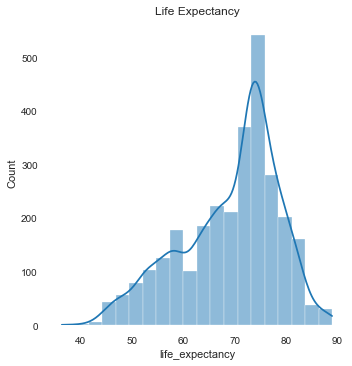

In [31]:
# Plotting a KDE plot for world data
sns.displot(LE_df["life_expectancy"], bins=20, kde=True)
plt.title('Life Expectancy')

In [32]:
LE_df.corr()['life_expectancy']

year                               0.170613
life_expectancy                    1.000000
adult_mortality                   -0.695826
infant_deaths                     -0.196603
percentage_expenditure             0.381033
measles                           -0.157633
bmi                                0.573009
under-five_deaths                 -0.222553
polio                              0.460559
diphtheria                         0.475202
hiv/aids                          -0.556261
thinness__1-19_years              -0.472585
thinness_5-9_years                -0.467051
income_composition_of_resources    0.692281
schooling                          0.716407
Name: life_expectancy, dtype: float64

<AxesSubplot:>

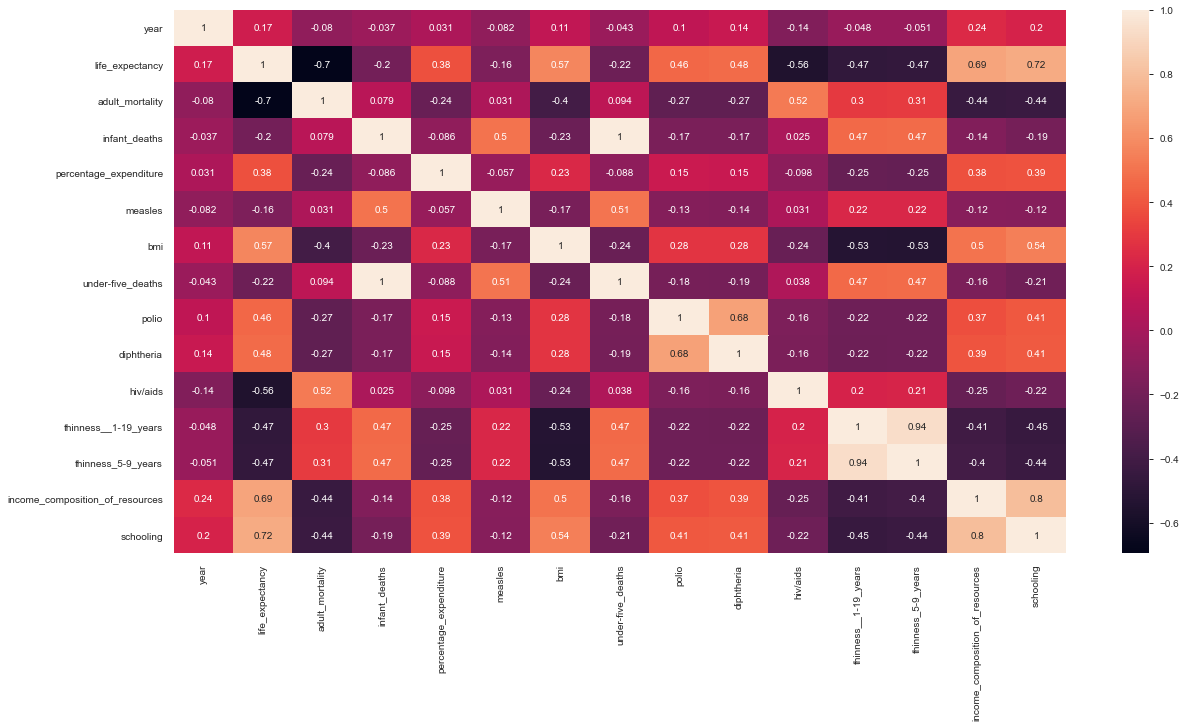

In [33]:
plt.figure(figsize = (20, 10)) 
sns.heatmap(LE_df.corr(), annot = True) 


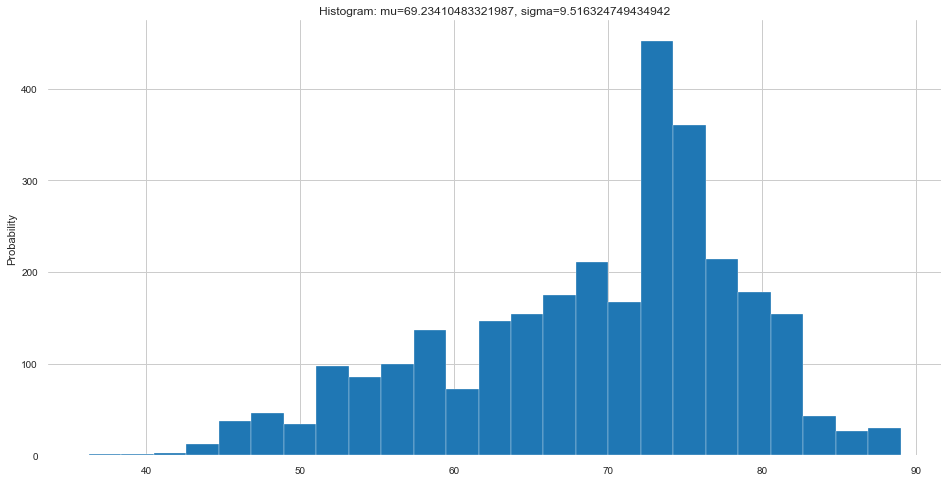

In [34]:
mu = LE_df['life_expectancy'].mean()   
sigma = LE_df['life_expectancy'].std() 
plt.figure(figsize = (16, 8)) 
plt.hist(LE_df['life_expectancy'], bins=25);
plt.grid()
plt.ylabel('Probability')
plt.title('Histogram: mu=' + str(mu) + ', sigma=' +str(sigma));


### Visualization of Nepal's Data

In [35]:
nepal=LE_df[LE_df['country'].str.contains('Nepal')]

In [36]:
nepal

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1813,Nepal,2015,Developing,69.2,165.0,17,0.000000,1599,19.1,21,9.0,91.0,0.1,15.7,16.1,0.555,12.2
1814,Nepal,2014,Developing,69.6,158.0,18,8.523486,1279,18.5,22,92.0,92.0,0.1,15.9,16.3,0.551,12.4
1815,Nepal,2013,Developing,69.3,162.0,19,80.155051,1861,18.0,24,92.0,92.0,0.1,16.1,16.5,0.545,12.3
1816,Nepal,2012,Developing,68.9,167.0,20,80.587884,3362,17.4,25,9.0,9.0,0.2,16.3,16.7,0.538,12.3
1817,Nepal,2011,Developing,68.4,172.0,22,112.122903,2359,16.9,27,92.0,92.0,0.2,16.5,16.9,0.529,12.0
1818,Nepal,2010,Developing,68.0,178.0,23,84.623025,190,16.4,30,83.0,82.0,0.2,16.7,17.2,0.515,11.1
1819,Nepal,2009,Developing,67.5,183.0,25,6.193570,189,15.9,32,93.0,89.0,0.2,16.9,17.4,0.502,10.5
1820,Nepal,2008,Developing,67.0,189.0,27,70.271132,2089,15.4,35,82.0,82.0,0.2,17.0,17.6,0.492,10.1
1821,Nepal,2007,Developing,66.6,194.0,29,52.229065,1415,14.9,38,82.0,82.0,0.2,17.2,17.8,0.486,10.0
1822,Nepal,2006,Developing,66.0,21.0,31,45.879899,2838,14.4,41,91.0,89.0,0.2,17.4,18.0,0.476,9.6


In [37]:
nepal.describe()

,year,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2007.500000,66.481250,147.250000,29.125000,40.162064,4663.562500,15.175000,38.125000,69.125000,73.687500,0.156250,17.131250,17.668750,0.494375,10.431250
std,4.760952,2.388924,77.702424,9.287088,35.693726,4409.556349,2.418677,13.270895,30.856388,26.466882,0.051235,0.888984,0.991106,0.040100,1.402245
min,2000.000000,62.500000,21.000000,17.000000,0.000000,189.000000,11.400000,21.000000,8.000000,8.000000,0.100000,15.700000,16.100000,0.439000,8.600000
25%,2003.750000,64.600000,125.500000,21.500000,7.941007,1553.000000,13.275000,26.500000,72.750000,73.500000,0.100000,16.450000,16.850000,0.461500,9.275000
50%,2007.500000,66.800000,169.500000,28.000000,27.557910,2598.500000,15.150000,36.500000,80.000000,82.000000,0.200000,17.100000,17.700000,0.489000,10.050000
75%,2011.250000,68.525000,190.250000,35.750000,72.742112,7411.000000,17.025000,47.750000,91.250000,89.500000,0.200000,17.850000,18.450000,0.531250,12.050000
max,2015.000000,69.600000,238.000000,46.000000,112.122903,13344.000000,19.100000,62.000000,93.000000,92.000000,0.200000,18.500000,19.200000,0.555000,12.400000


In [38]:
nepal.shape

(16, 17)

In [39]:
nepal

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1813,Nepal,2015,Developing,69.2,165.0,17,0.000000,1599,19.1,21,9.0,91.0,0.1,15.7,16.1,0.555,12.2
1814,Nepal,2014,Developing,69.6,158.0,18,8.523486,1279,18.5,22,92.0,92.0,0.1,15.9,16.3,0.551,12.4
1815,Nepal,2013,Developing,69.3,162.0,19,80.155051,1861,18.0,24,92.0,92.0,0.1,16.1,16.5,0.545,12.3
1816,Nepal,2012,Developing,68.9,167.0,20,80.587884,3362,17.4,25,9.0,9.0,0.2,16.3,16.7,0.538,12.3
1817,Nepal,2011,Developing,68.4,172.0,22,112.122903,2359,16.9,27,92.0,92.0,0.2,16.5,16.9,0.529,12.0
1818,Nepal,2010,Developing,68.0,178.0,23,84.623025,190,16.4,30,83.0,82.0,0.2,16.7,17.2,0.515,11.1
1819,Nepal,2009,Developing,67.5,183.0,25,6.193570,189,15.9,32,93.0,89.0,0.2,16.9,17.4,0.502,10.5
1820,Nepal,2008,Developing,67.0,189.0,27,70.271132,2089,15.4,35,82.0,82.0,0.2,17.0,17.6,0.492,10.1
1821,Nepal,2007,Developing,66.6,194.0,29,52.229065,1415,14.9,38,82.0,82.0,0.2,17.2,17.8,0.486,10.0
1822,Nepal,2006,Developing,66.0,21.0,31,45.879899,2838,14.4,41,91.0,89.0,0.2,17.4,18.0,0.476,9.6


Text(0.5, 1.0, 'Life Expectancy of Nepal')

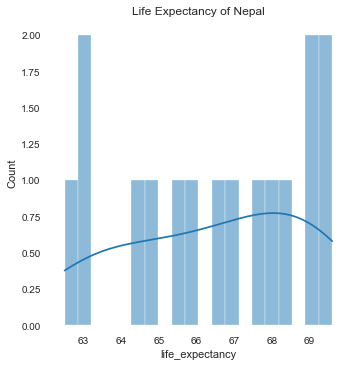

In [40]:

sns.displot(nepal["life_expectancy"], bins=20, kde=True)
plt.title('Life Expectancy of Nepal')



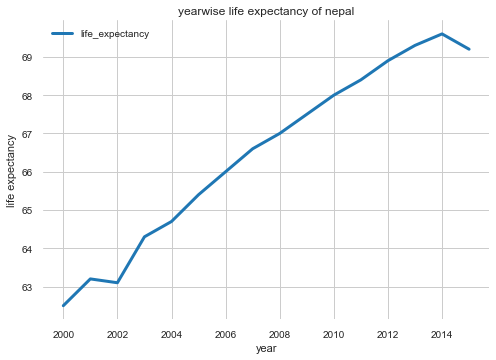

In [41]:
nepal.plot(x = 'year', y = 'life_expectancy', linewidth =3)
plt.ylabel('life expectancy')
plt.title('yearwise life expectancy of nepal')
plt.grid()


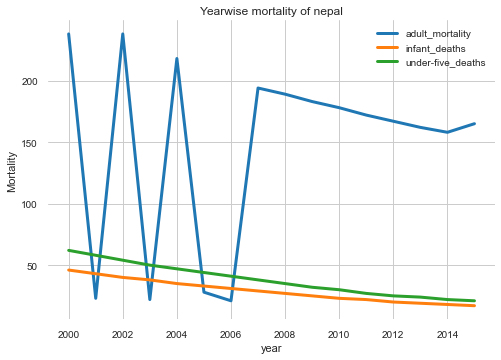

In [42]:
nepal.plot(x = 'year', y = ['adult_mortality','infant_deaths','under-five_deaths'], linewidth =3)
plt.ylabel('Mortality')
plt.title('Yearwise mortality of nepal')
plt.grid()

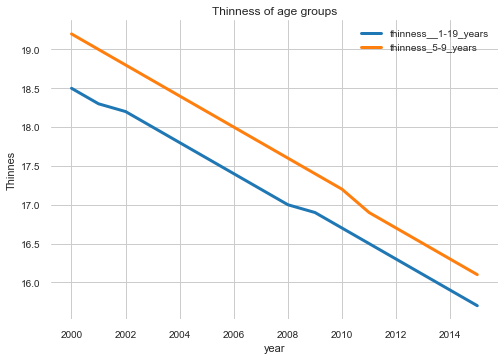

In [43]:
nepal.plot(x = 'year', y = ['thinness__1-19_years','thinness_5-9_years',], linewidth =3)
plt.ylabel('Thinnes')
plt.title('Thinness of age groups')
plt.grid()


<AxesSubplot:xlabel='bmi', ylabel='Density'>

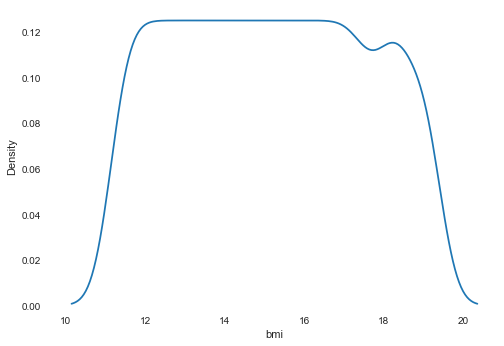

In [44]:
sns.kdeplot(data=nepal, x="bmi", bw_adjust=.3)


In [45]:
nepal.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'diphtheria', 'hiv/aids',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

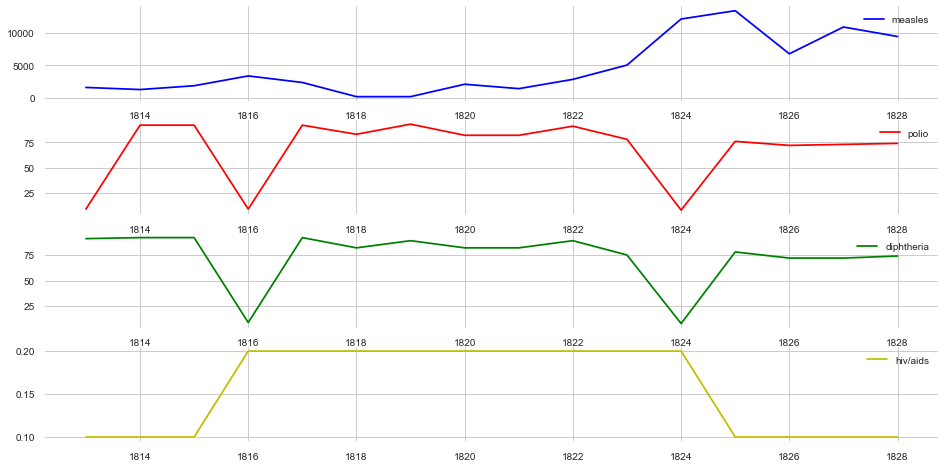

In [46]:
plt.figure(figsize = (16,8))
plt.subplot(4, 1, 1)
plt.plot(nepal.index, nepal['measles'],color='b');
plt.grid()
plt.legend(['measles'])

plt.subplot(4, 1, 2)
plt.plot(nepal.index,nepal['polio'],color='r');
plt.grid()
plt.legend(['polio'])


plt.subplot(4, 1, 3)
plt.plot(nepal.index, nepal['diphtheria'],color='g');
plt.grid()
plt.legend(['diphtheria'])

plt.subplot(4, 1, 4)
plt.plot(nepal.index, nepal['hiv/aids'],color='y');
plt.grid()
plt.legend(['hiv/aids'])




C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Nepals life expectancy boxplot')

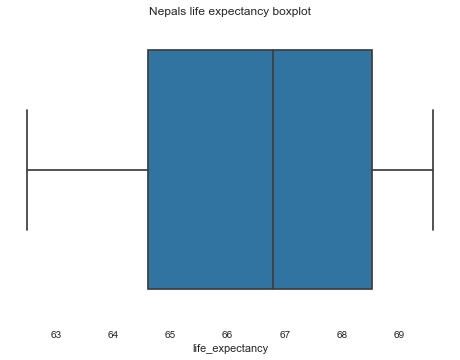

In [47]:
sns.boxplot(nepal['life_expectancy'], orient='h')
plt.title('Nepals life expectancy boxplot')


In [48]:
nepal.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'diphtheria', 'hiv/aids',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

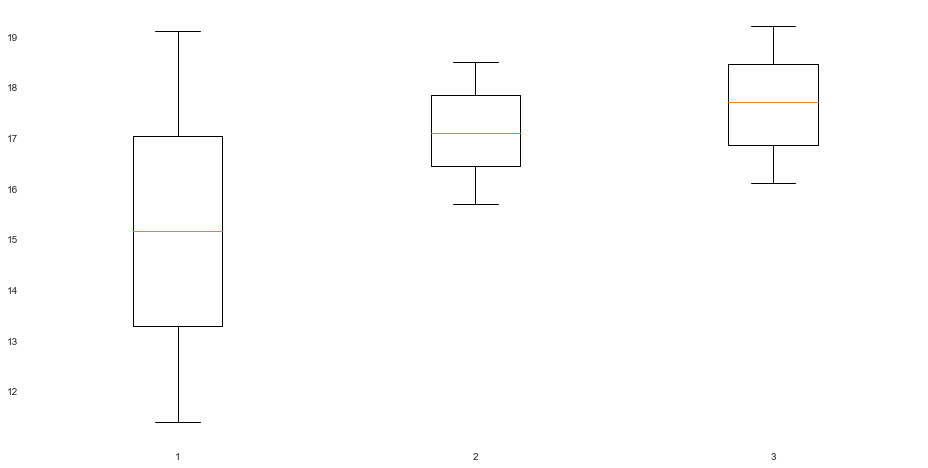

In [49]:


a = nepal['bmi']
b = nepal['thinness__1-19_years']
c = nepal['thinness_5-9_years']


val = [a,b,c]

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(val)




### Developed vs Developing country's data visualization

In [50]:
developed = LE_df[ LE_df['status']=='Developed']
developing = LE_df[ LE_df['status']=='Developing']


In [51]:
developed

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1,0.00000,74,66.6,1,93.0,93.0,0.1,0.6,0.6,0.937000,20.400000
113,Australia,2014,Developed,82.7,6.0,1,10769.36305,340,66.1,1,92.0,92.0,0.1,0.6,0.6,0.936000,20.400000
114,Australia,2013,Developed,82.5,61.0,1,11734.85381,158,65.5,1,91.0,91.0,0.1,0.6,0.6,0.933000,20.300000
115,Australia,2012,Developed,82.3,61.0,1,11714.99858,199,65.0,1,92.0,92.0,0.1,0.6,0.6,0.930000,20.100000
116,Australia,2011,Developed,82.0,63.0,1,10986.26527,190,64.4,1,92.0,92.0,0.1,0.6,0.6,0.927000,19.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,0.00000,37,63.1,33,92.0,96.0,0.1,0.7,0.6,0.627551,11.992793
2806,United States of America,2003,Developed,77.2,114.0,28,0.00000,56,62.4,33,91.0,96.0,0.1,0.7,0.6,0.627551,11.992793
2807,United States of America,2002,Developed,77.0,115.0,28,0.00000,41,61.7,33,9.0,94.0,0.1,0.8,0.6,0.627551,11.992793
2808,United States of America,2001,Developed,76.9,115.0,28,0.00000,116,6.9,33,89.0,94.0,0.1,0.8,0.6,0.627551,11.992793


In [52]:
developing

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


Text(0.5, 1.0, 'Developed vs Developing country')

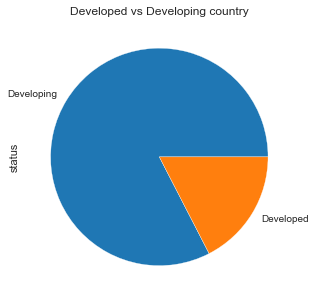

In [53]:
plt.figure(figsize = (5,5))
LE_df['status'].value_counts().plot(kind='pie')
plt.title('Developed vs Developing country')

In [54]:
LE_df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'diphtheria', 'hiv/aids',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

Text(0.5, 1.0, 'pairplot of mortality')

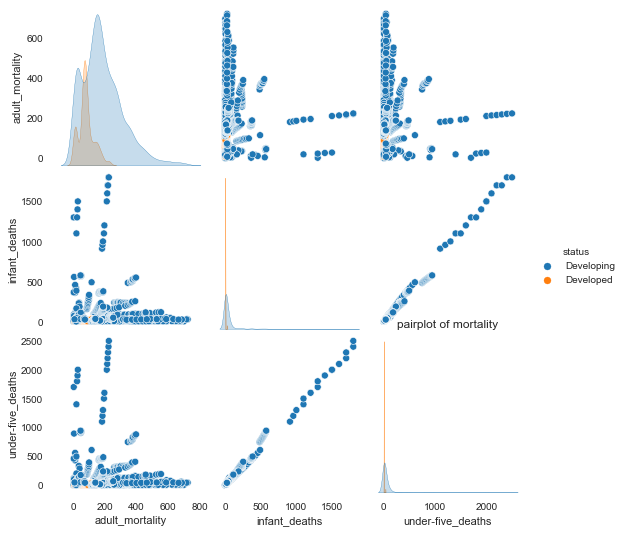

In [55]:


sns.pairplot(LE_df, hue = 'status', vars = ['adult_mortality','infant_deaths',  'under-five_deaths'])
plt.title('pairplot of mortality')

C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'distplot developed vs developing')

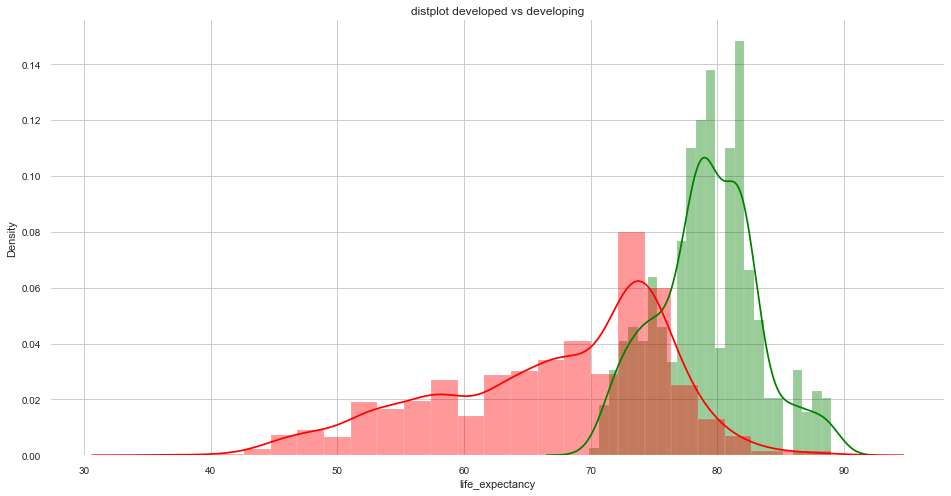

In [56]:
plt.figure(figsize=(16, 8))
bin=25
sns.distplot(developed['life_expectancy'], bins = bin, color = 'green')
sns.distplot(developing['life_expectancy'], bins = bin, color = 'red')
plt.grid()
plt.title('distplot developed vs developing')

In [57]:
LE_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


Text(0.5, 1.0, 'bmi and thinness 1-19 scatterplot')

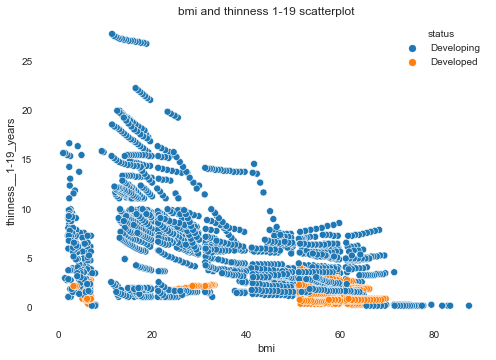

In [58]:
sns.scatterplot(x = 'bmi', y = 'thinness__1-19_years', hue = 'status', data = LE_df)
plt.title('bmi and thinness 1-19 scatterplot')

Text(0.5, 1.0, 'bmi and thinnes 5-9 scatterplot')

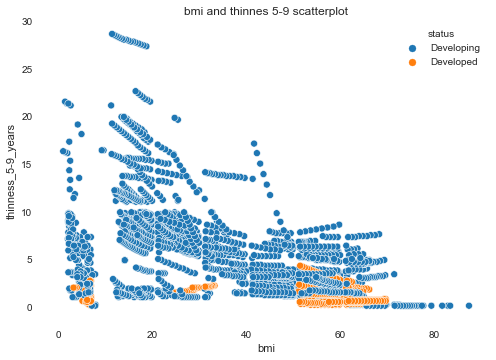

In [59]:
sns.scatterplot(x = 'bmi', y = 'thinness_5-9_years', hue = 'status', data = LE_df)
plt.title('bmi and thinnes 5-9 scatterplot')

Text(0.5, 1.0, 'schoolig comparision')

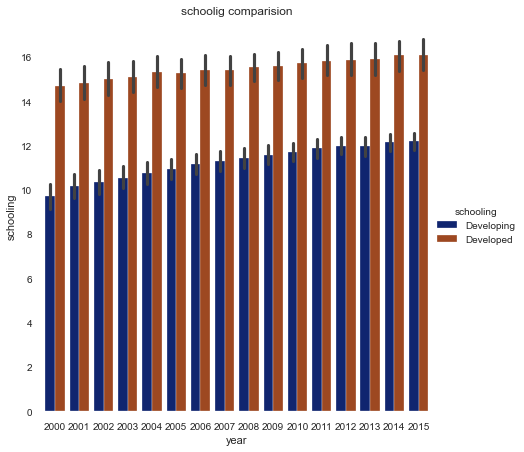

In [60]:
schooling = sns.catplot(data=LE_df, kind="bar",x="year", y="schooling", hue="status",palette="dark",height=6)

schooling.legend.set_title("schooling")
plt.title('schoolig comparision')

Text(0.5, 1.0, 'income compostion comparison')

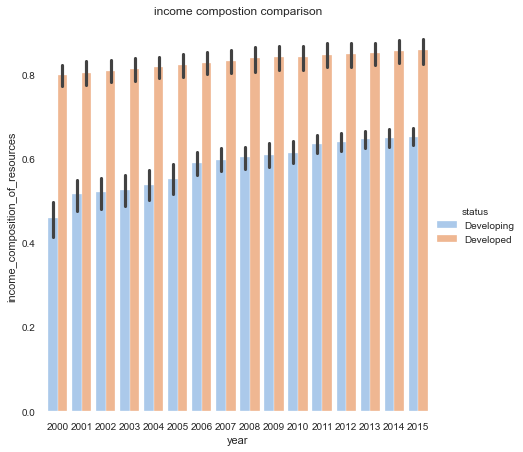

In [62]:
ic = sns.catplot(data=LE_df, kind="bar",x="year", y="income_composition_of_resources", hue="status",palette="pastel",height=6)
schooling.legend.set_title("income compostion of resources")
plt.title('income compostion comparison')

Text(0.5, 1.0, 'life expectancy vs mortality')

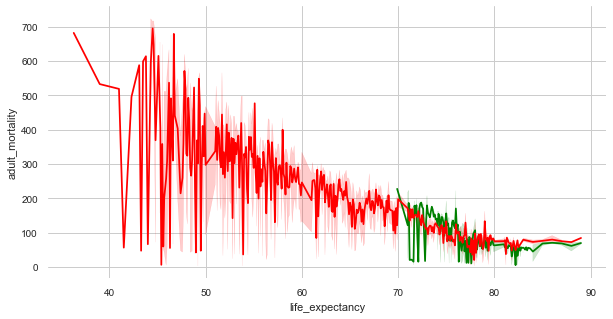

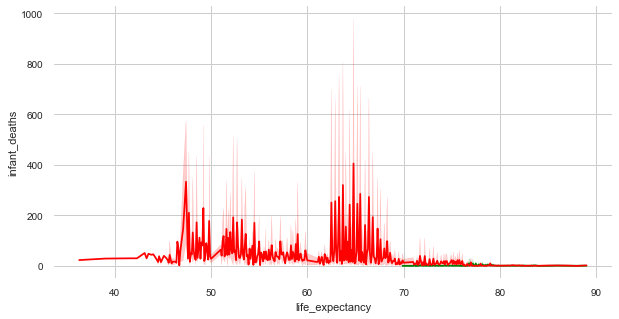

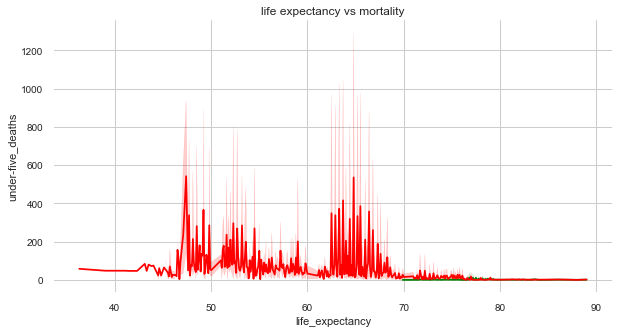

In [63]:

plt.figure(figsize=(10,5))
sns.lineplot(x=developed['life_expectancy'],y=developed['adult_mortality'],color = 'green')
sns.lineplot(x=developing['life_expectancy'],y=developing['adult_mortality'], color = 'red')
plt.grid()


plt.figure(figsize=(10,5))
sns.lineplot(x=developed['life_expectancy'],y=developed['infant_deaths'],color = 'green')
sns.lineplot(x=developing['life_expectancy'],y=developing['infant_deaths'], color = 'red')
plt.grid()


plt.figure(figsize=(10, 5))
sns.lineplot(x=developed['life_expectancy'],y=developed['under-five_deaths'],color = 'green')
sns.lineplot(x=developing['life_expectancy'],y=developing['under-five_deaths'], color = 'red')
plt.grid()


plt.title('life expectancy vs mortality')



 


Text(0.5, 1.0, 'disease comparision')

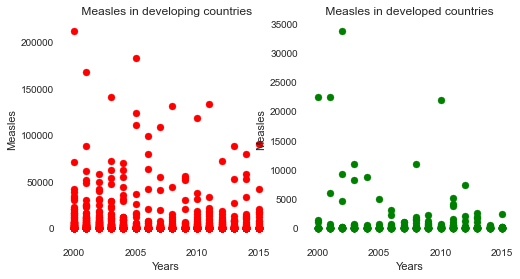

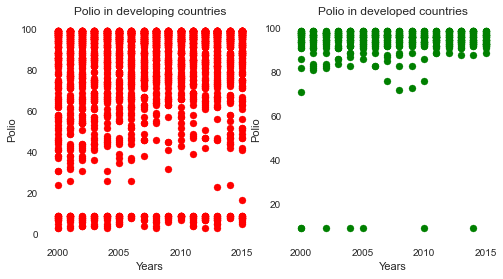

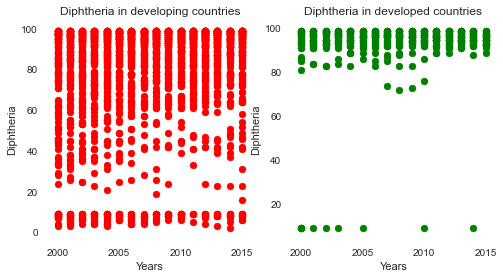

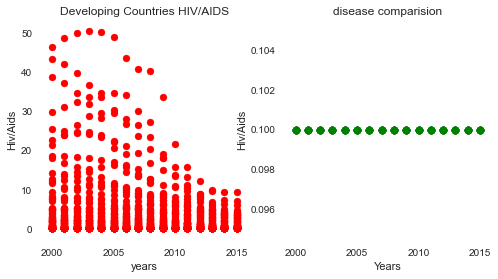

In [64]:
#disease rate comparison


#measles
fig_one, (m1, m2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

m1.scatter(developing["year"],developing["measles"],color='red')
m1.set_title(' Measles in developing countries ')
m1.set_ylabel("Measles")
m1.set_xlabel("Years")

m2.scatter(developed['year'],developed["measles"],color='green')
m2.set_title(' Measles in developed countries ')
m2.set_ylabel("Measles")
m2.set_xlabel("Years")


#polio

fig_two,(p1, p2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

p1.scatter(developing['year'], developing["polio"],color='red')
p1.set_title('Polio in developing countries')
p1.set_ylabel("Polio")
p1.set_xlabel("Years")

p2.scatter(developed['year'], developed["polio"],color='green')
p2.set_title('Polio in developed countries')
p2.set_ylabel("Polio")
p2.set_xlabel("Years")

#diphtheria

fig_three,(d1, d2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

d1.scatter(developing['year'], developing["diphtheria"],color='red')
d1.set_title('Diphtheria in developing countries')
d1.set_ylabel("Diphtheria")
d1.set_xlabel("Years")

d2.scatter(developed['year'], developed["diphtheria"],color='green')
d2.set_title('Diphtheria in developed countries')
d2.set_ylabel("Diphtheria")
d2.set_xlabel("Years")



#hiv/aids

fig_four,(h1, h2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

h1.scatter(developing['year'], developing["hiv/aids"],color='red')
h1.set_title('Developing Countries HIV/AIDS')
h1.set_ylabel("Hiv/Aids")
h1.set_xlabel("years")

h2.scatter(developed['year'], developed["hiv/aids"],color='green')
h2.set_title('Developed Countries HIV/AIDS')
h2.set_ylabel("Hiv/Aids")
h2.set_xlabel("Years")

plt.title('disease comparision')

Text(0.5, 1.0, 'Violin plot of LE in developing countries')

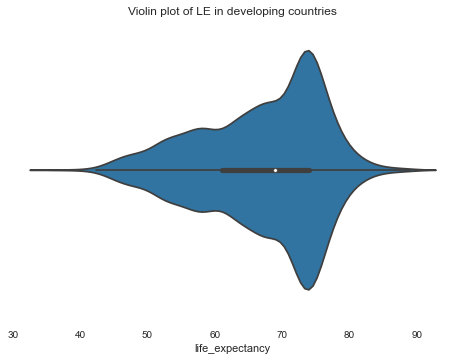

In [65]:
d1 = sns.violinplot(x=developing["life_expectancy"])
d1.set_title('Violin plot of LE in developing countries')
plt.title('Violin plot of LE in developing countries')



Text(0.5, 1.0, 'Violin plot of LE in developed countries')

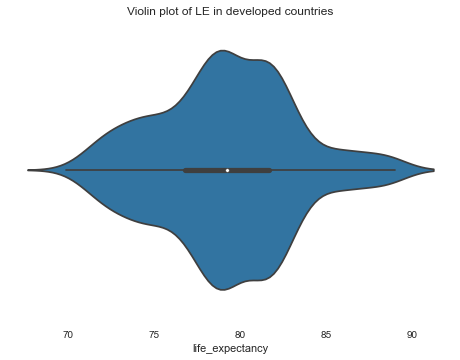

In [66]:
d2 = sns.violinplot(x=developed["life_expectancy"])
d2.set_title('Violin plot of LE in developed countries')
plt.title('Violin plot of LE in developed countries')

Text(0.5, 1.0, 'percentage exp comparison')

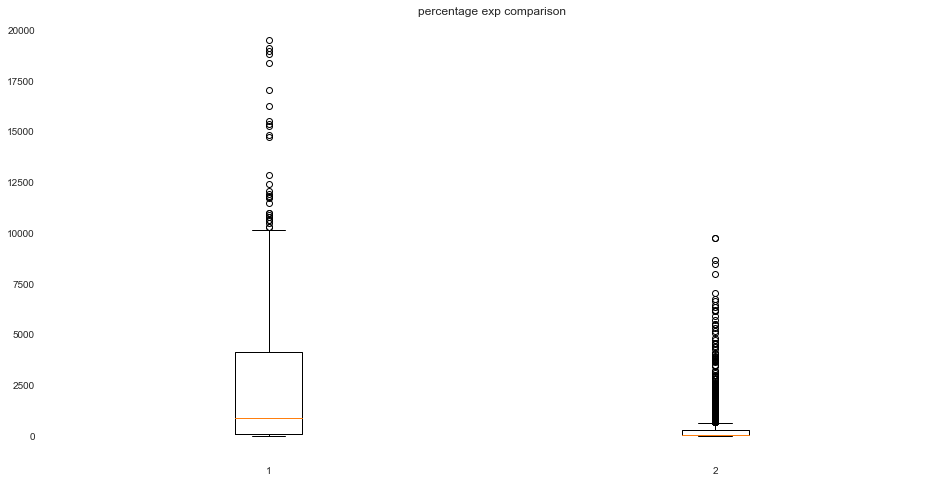

In [67]:
a = developed['percentage_expenditure']
b = developing['percentage_expenditure']

val = [a,b]

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(val)
plt.title('percentage exp comparison')

### World's LE data visualization

In [68]:
LE_df1 = LE_df.copy()
LE_df1


,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


In [69]:
LE_df1.tail(10)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2928,Zimbabwe,2009,Developing,50.0,587.0,30,1.040021,853,29.0,45,69.0,73.0,18.1,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,20.843429,0,28.6,46,75.0,75.0,20.5,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,29.814566,242,28.2,46,73.0,73.0,23.7,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,34.262169,212,27.9,45,71.0,7.0,26.8,8.6,8.6,0.408,9.5
2932,Zimbabwe,2005,Developing,44.6,717.0,28,8.717409,420,27.5,43,69.0,68.0,30.3,9.0,9.0,0.406,9.3
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,0.000000,1483,25.5,39,78.0,78.0,43.5,11.0,11.2,0.434,9.8


In [70]:
# countries with max life expectancy countries with least life expectancy according to recent year data 
df1 = LE_df1[LE_df.year == LE_df.year.max()]
df1
df1.sort_values('life_expectancy', ascending=False, inplace=True)
new=df1.head(10)
new = new.append(df1.tail(10))
new


C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2345,Slovenia,2015,Developed,88.0,74.0,0,0.0,18,6.1,0,95.0,95.0,0.1,1.400000,1.300000,0.888000,17.300000
737,Denmark,2015,Developed,86.0,71.0,0,0.0,9,58.8,0,93.0,93.0,0.1,1.100000,0.900000,0.923000,19.200000
673,Cyprus,2015,Developed,85.0,52.0,0,0.0,0,6.3,0,97.0,97.0,0.1,1.000000,1.000000,0.854000,14.300000
544,Chile,2015,Developing,85.0,82.0,2,0.0,9,63.8,2,96.0,96.0,0.1,0.800000,0.800000,0.845000,16.300000
1314,Japan,2015,Developed,83.7,55.0,2,0.0,35,29.0,3,99.0,96.0,0.1,2.100000,1.800000,0.902000,15.300000
2521,Switzerland,2015,Developed,83.4,49.0,0,0.0,35,57.4,0,97.0,97.0,0.1,0.400000,0.300000,0.938000,16.000000
2313,Singapore,2015,Developed,83.1,55.0,0,0.0,0,33.2,0,96.0,96.0,0.1,2.200000,2.200000,0.924000,15.400000
2425,Spain,2015,Developed,82.8,56.0,1,0.0,115,66.6,1,97.0,97.0,0.1,0.600000,0.500000,0.882000,17.700000
112,Australia,2015,Developed,82.8,59.0,1,0.0,74,66.6,1,93.0,93.0,0.1,0.600000,0.600000,0.937000,20.400000
1282,Italy,2015,Developed,82.7,56.0,1,0.0,159,63.6,2,93.0,93.0,0.1,0.600000,0.600000,0.881000,16.300000


Text(0.5, 1.0, '2015 data of Life Expectency of highest 10 and lowest 10 countries')

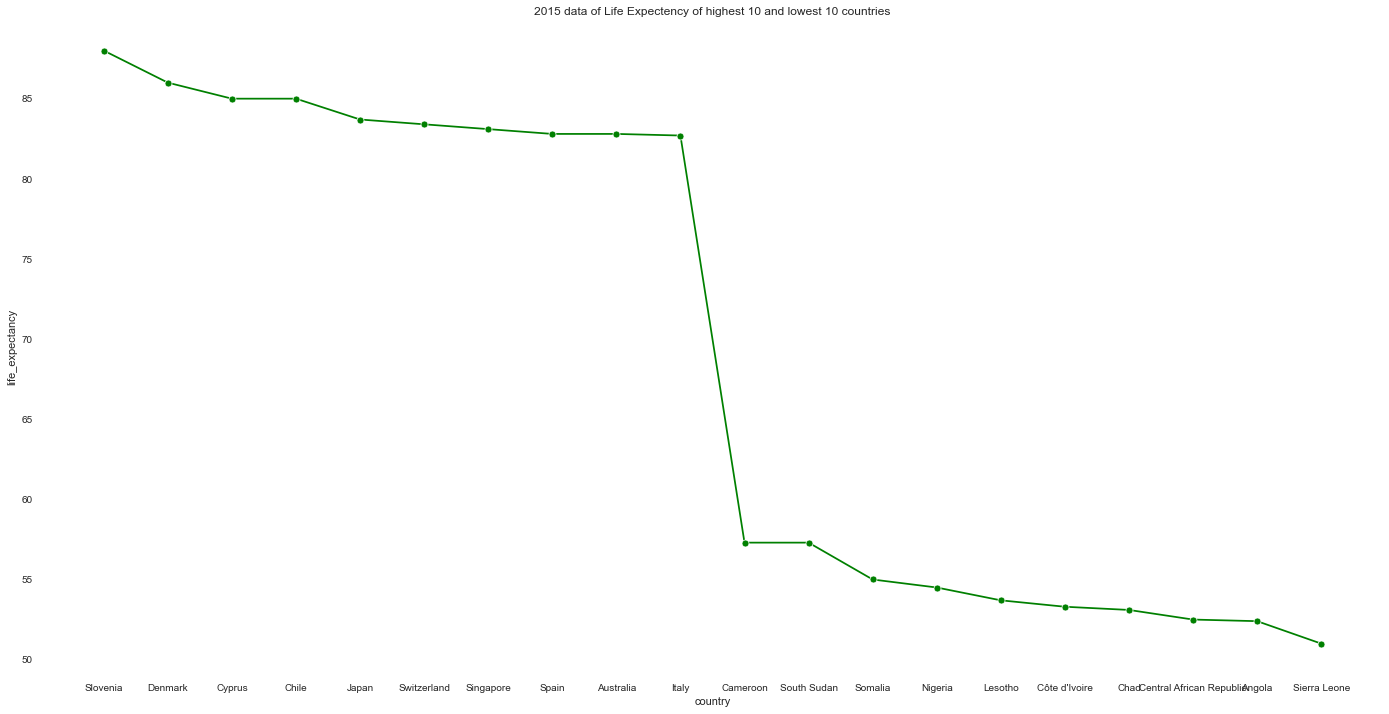

In [71]:
fig = plt.figure(figsize=(24, 12))
sns.lineplot(data=new, x='country', y='life_expectancy',marker='o' ,color='g')
plt.title('2015 data of Life Expectency of highest 10 and lowest 10 countries')


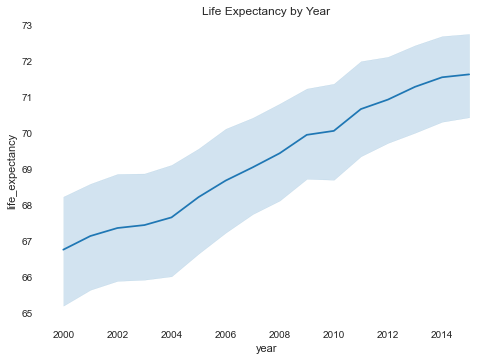

In [72]:
sns.lineplot(x='year', y='life_expectancy', data=LE_df)
plt.title('Life Expectancy by Year')
plt.show()


In [73]:
LE_df['life_expectancy'].describe()

count    2938.000000
mean       69.234105
std         9.516325
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64

Text(0.5, 1.0, 'World LE histplot')

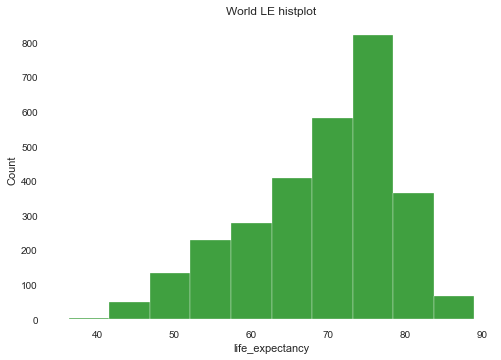

In [74]:
sns.histplot(data=LE_df, x="life_expectancy", bins=10,color='g')
plt.title('World LE histplot')

<AxesSubplot:xlabel='life_expectancy', ylabel='Count'>

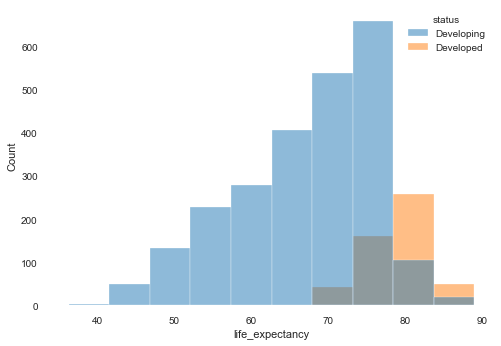

In [75]:
sns.histplot(data=LE_df, x="life_expectancy", bins=10,hue='status')


Text(0.5, 1.0, 'life expectancy kde plot')

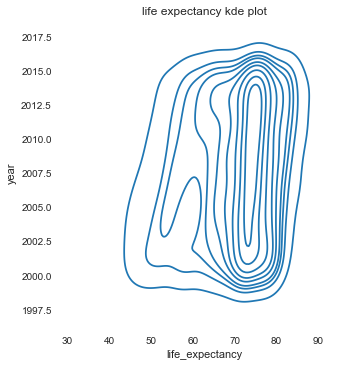

In [76]:
sns.displot(data=LE_df, x='life_expectancy',y='year' ,kind="kde")
plt.title('life expectancy kde plot')

### For predictions


In [77]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression as lr       
from sklearn.metrics.regression import mean_squared_error, r2_score
from scipy import stats


C:\Users\Dell\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [78]:
LE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   percentage_expenditure           2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   under-five_deaths                2938 non-null   int64  
 10  polio                            2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

In [79]:
temp=LE_df.copy()

In [80]:
LE_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


In [81]:
temp.drop(['country','year','status'],axis=1,inplace=True)

In [82]:
temp

,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


In [83]:
temp.to_csv('ForPrediction.csv', header=True, index=False)

In [84]:
for_pred=pd.read_csv('ForPrediction.csv')

for_pred

,life_expectancy,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,65.0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,59.9,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,59.9,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,59.5,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,59.2,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,0.000000,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,0.000000,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,0.000000,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,0.000000,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0.427,9.8


### Model 

In [85]:
target=for_pred['life_expectancy']
target

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: life_expectancy, Length: 2938, dtype: float64

In [86]:
features=for_pred[for_pred.columns.difference(['schooling'])]
features

,adult_mortality,bmi,diphtheria,hiv/aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,thinness_5-9_years,thinness__1-19_years,under-five_deaths
0,263.0,19.1,65.0,0.1,0.479,62,65.0,1154,71.279624,6.0,17.3,17.2,83
1,271.0,18.6,62.0,0.1,0.476,64,59.9,492,73.523582,58.0,17.5,17.5,86
2,268.0,18.1,64.0,0.1,0.470,66,59.9,430,73.219243,62.0,17.7,17.7,89
3,272.0,17.6,67.0,0.1,0.463,69,59.5,2787,78.184215,67.0,18.0,17.9,93
4,275.0,17.2,68.0,0.1,0.454,71,59.2,3013,7.097109,68.0,18.2,18.2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27.1,65.0,33.6,0.407,27,44.3,31,0.000000,67.0,9.4,9.4,42
2934,715.0,26.7,68.0,36.7,0.418,26,44.5,998,0.000000,7.0,9.9,9.8,41
2935,73.0,26.3,71.0,39.8,0.427,25,44.8,304,0.000000,73.0,1.3,1.2,40
2936,686.0,25.9,75.0,42.1,0.427,25,45.3,529,0.000000,76.0,1.7,1.6,39


In [87]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [88]:
X_train

,adult_mortality,bmi,diphtheria,hiv/aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,thinness_5-9_years,thinness__1-19_years,under-five_deaths
1438,259.0,13.8,49.0,0.1,0.477,12,59.8,1810,0.000000,52.0,1.300000,1.200000,17
2362,183.0,49.7,88.0,0.1,0.512,0,68.8,0,3.718439,94.0,1.200000,1.100000,0
2468,278.0,14.1,74.0,0.2,0.415,68,59.7,9562,37.044800,74.0,4.870317,4.839704,102
548,86.0,61.2,94.0,0.1,0.820,2,79.8,6,211.614293,93.0,0.800000,0.800000,2
1393,222.0,67.9,9.0,0.1,0.000,0,64.1,0,11.075433,9.0,0.200000,0.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,211.0,24.5,99.0,0.5,0.604,0,69.8,11,0.000000,98.0,16.000000,15.400000,0
352,142.0,56.1,96.0,0.1,0.754,42,75.0,214,0.000000,98.0,2.600000,2.700000,47
1716,222.0,52.7,99.0,0.1,0.733,1,68.8,20359,0.000000,99.0,2.300000,2.200000,1
515,439.0,21.2,47.0,5.1,0.366,16,53.0,141,7.344808,47.0,8.600000,8.700000,23


In [89]:
y_train

1438    59.8
2362    68.8
2468    59.7
548     79.8
1393    64.1
        ... 
288     69.8
352     75.0
1716    68.8
515     53.0
2281    73.2
Name: life_expectancy, Length: 2056, dtype: float64

In [90]:
X_test

,adult_mortality,bmi,diphtheria,hiv/aids,income_composition_of_resources,infant_deaths,life_expectancy,measles,percentage_expenditure,polio,thinness_5-9_years,thinness__1-19_years,under-five_deaths
1600,144.0,27.0,96.0,0.1,0.725000,4,72.7,2198,210.241700,95.0,9.4,9.7,5
2771,82.0,61.3,92.0,0.1,0.627551,4,79.3,764,0.000000,92.0,0.5,0.7,4
2088,66.0,31.2,99.0,0.1,0.627551,1,82.0,442,0.000000,99.0,1.0,1.5,2
1211,191.0,19.7,72.0,0.1,0.632000,159,67.3,20422,72.015932,78.0,1.8,1.8,194
1651,25.0,3.8,73.0,0.9,0.513000,8,63.1,1,0.000000,67.0,7.5,7.8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,317.0,18.4,88.0,5.0,0.514000,62,59.1,1218,7.146851,89.0,8.1,8.2,91
12,295.0,13.4,41.0,0.1,0.373000,87,56.7,798,11.089053,41.0,19.9,19.7,122
2037,221.0,18.3,79.0,0.1,0.622000,68,66.8,7360,69.020425,76.0,9.7,1.0,89
900,192.0,61.1,99.0,0.1,0.719000,0,69.6,0,460.648780,99.0,3.7,4.0,0


In [91]:
y_test

1600    72.7
2771    79.3
2088    82.0
1211    67.3
1651    63.1
        ... 
1368    59.1
12      56.7
2037    66.8
900     69.6
1625    55.5
Name: life_expectancy, Length: 882, dtype: float64

In [92]:
model = linear_model.LinearRegression()

In [93]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_pred=model.predict(X_test)
y_pred

array([72.7, 79.3, 82. , 67.3, 63.1, 73.9, 72. , 67.3, 65.6, 64.6, 64.3,
       78.1, 72.8, 72.8, 69.1, 67.5, 76.9, 76.9, 63. , 66.1, 66.2, 75.8,
       78.4, 82.5, 74.7, 73.7, 73.3, 70. , 57.9, 62. , 66.7, 73.5, 51.7,
       66.8, 81.3, 61. , 74.4, 79.8, 64.8, 71. , 63.8, 73.9, 82. , 61.4,
       67.2, 71.8, 66.6, 76.8, 67.1, 49.9, 78.9, 54.3, 82.3, 80. , 56.9,
       55.6, 73.7, 53.7, 68.3, 73.9, 71.4, 76. , 84. , 64.9, 73.3, 62.7,
       72. , 44.3, 73.7, 64.7, 53.7, 54.9, 54.5, 78. , 75. , 82.2, 78.2,
       78.2, 77.3, 75.8, 54.7, 65. , 82.8, 79.3, 52.2, 65. , 72.2, 78.6,
       71.8, 79. , 59.8, 59.5, 54. , 57.6, 67. , 72.3, 44.6, 68.8, 75.5,
       78. , 74.5, 72.5, 86. , 83. , 78.3, 59. , 59.8, 45.3, 57.9, 49. ,
       78.9, 71. , 57.3, 74. , 69.8, 74.2, 48.5, 78.1, 69.1, 72.7, 65.5,
       64.3, 78.2, 84. , 72.5, 81.2, 79.7, 67. , 74.7, 43.5, 74.3, 65.3,
       59.7, 71.1, 54.1, 86. , 51. , 66.8, 77.6, 55.3, 76.6, 68.7, 73.5,
       78.1, 73. , 74.1, 58.1, 46.6, 75. , 61. , 77

In [95]:
#coefficients and accuracy
print('Coefficients: \n', model.coef_)
print('\n')
print('MSE: ', mean_squared_error(y_test,y_pred))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)
print('R2 score: ',r2_score(y_test, y_pred))



Coefficients: 
 [-3.08429667e-16 -1.42247325e-16  7.31728046e-16 -8.73595900e-16
  2.00509724e-15  2.55871713e-16  1.00000000e+00 -6.07153217e-18
  1.04083409e-17  6.17182087e-17  5.90263380e-16 -4.58251601e-16
  1.53251977e-16]


MSE:  6.475857554972409e-27
RMSE:  8.047271310806172e-14
R2 score:  1.0


### Prediction on new data


In [96]:

newdata = pd.DataFrame(columns=['adult_mortality',
       'infant_deaths', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'diphtheria', 'hiv/aids',
       'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'], data=[[162,19,81,1580,19,23,90,100,0.1,16,19,0.55,13]])

newdata


,adult_mortality,infant_deaths,percentage_expenditure,measles,bmi,under-five_deaths,polio,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,162,19,81,1580,19,23,90,100,0.1,16,19,0.55,13


In [97]:
predictions = model.predict(newdata)

print(predictions)

[90.]


In [98]:
print(np.sqrt(mean_squared_error([[69.3]],predictions)))

20.699999999998653
